In [1]:
import pandas as pd
vacc=pd.read_csv(r"C:\Users\rks91\Downloads\New folder\PytLogistic\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv")


In [2]:
vacc.h1n1_worry = vacc.h1n1_worry.fillna(0)
vacc.h1n1_awareness = vacc.h1n1_awareness.fillna(1)
vacc.antiviral_medication = vacc.antiviral_medication.fillna(0)
vacc.contact_avoidance = vacc.contact_avoidance.fillna(0)
vacc.bought_face_mask =vacc.bought_face_mask.fillna(0)
vacc.wash_hands_frequently=vacc.wash_hands_frequently.fillna(0)
vacc.avoid_large_gatherings=vacc.avoid_large_gatherings.fillna(0)
vacc.reduced_outside_home_cont=vacc.reduced_outside_home_cont.fillna(0)
vacc.avoid_touch_face=vacc.avoid_touch_face.fillna(0)
vacc.dr_recc_h1n1_vacc=vacc.dr_recc_h1n1_vacc.fillna(0)
vacc.dr_recc_seasonal_vacc=vacc.dr_recc_seasonal_vacc.fillna(0)
vacc.chronic_medic_condition= vacc.chronic_medic_condition.fillna(0)
vacc.cont_child_undr_6_mnths= vacc.cont_child_undr_6_mnths.fillna(0)
vacc.is_health_worker=vacc.is_health_worker.fillna(0)
vacc.has_health_insur = vacc.has_health_insur.fillna(0)
vacc.is_h1n1_vacc_effective= vacc.is_h1n1_vacc_effective.fillna(2)
vacc.is_h1n1_risky = vacc.is_h1n1_risky.fillna(2)
vacc.sick_from_h1n1_vacc= vacc.sick_from_h1n1_vacc.fillna(2)
vacc.is_seas_vacc_effective= vacc.is_seas_vacc_effective.fillna(2)
vacc.is_seas_risky = vacc.is_seas_risky.fillna(2)
vacc.sick_from_seas_vacc= vacc.sick_from_seas_vacc.fillna(2)
vacc.qualification= vacc.qualification.fillna("12 Years")
vacc.income_level= vacc.income_level.fillna("<= $75,000, Above Poverty")
vacc.marital_status= vacc.marital_status.fillna("Not Married")
vacc.housing_status= vacc.housing_status.fillna("Rent")
vacc.employment= vacc.employment.fillna("Employed")
vacc.no_of_adults= vacc.no_of_adults.fillna(1)
vacc.no_of_children= vacc.no_of_children.fillna(1)

In [5]:
#vacc.isnull().sum()

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
vacc = vacc.iloc[:, 1: ]

In [5]:
vacc[vacc.select_dtypes(include=['object']).columns ] = vacc[ vacc.select_dtypes(include=['object']).columns ].apply(le.fit_transform)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
vacc_train,vacc_test=train_test_split(vacc,test_size=.2,random_state=555)

In [8]:
vacc_train_x=vacc_train.iloc[:,0:-1]
vacc_train_y=vacc_train.iloc[:,-1]

vacc_test_x=vacc_test.iloc[:,0:-1]
vacc_test_y=vacc_test.iloc[:,-1]

In [11]:
from sklearn.linear_model import LogisticRegression
glm=LogisticRegression()

In [12]:
glm.fit(vacc_train_x,vacc_train_y)

C:\Users\rks91\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
from sklearn.metrics import confusion_matrix

tab = confusion_matrix(glm.predict(vacc_test_x),vacc_test_y)
tab

array([[3942,  615],
       [ 227,  558]], dtype=int64)

In [16]:
pred=glm.predict(vacc_test_x)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(vacc_test_y,pred)

0.8423811306626732

In [18]:
from sklearn.metrics import precision_score
precision_score(vacc_test_y,pred)

0.710828025477707

In [30]:
#(3356+847)/(3356+847+840+299)

0.7867839760389367

In [31]:
#847/(840+847)

0.5020746887966805

In [20]:
glm.coef_

array([[ 9.46872957e-03,  2.22050970e-01,  1.40985185e-01,
        -5.99190870e-02,  1.77176422e-01,  3.94676044e-02,
        -1.23358022e-01, -2.27784693e-04,  3.98221154e-02,
         1.97557077e+00, -4.80255209e-01, -6.19941813e-03,
         3.09819271e-01,  7.92018876e-01,  1.42867407e+00,
         5.15189935e-01,  4.28567131e-01,  6.21586114e-04,
         2.96916161e-02,  1.31432855e-01, -8.67889454e-02,
         1.26774960e-01, -1.88975789e-02,  9.12948184e-02,
         2.20511715e-01, -4.35177778e-02, -6.92766987e-02,
         2.23469741e-01, -5.02491016e-02,  4.64407418e-02,
         2.34956689e-02,  2.21347722e-02]])

In [21]:
glm.intercept_

array([-7.11610987])

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
log_roc_auc=roc_auc_score(vacc_test_y,pred)
log_roc_auc

0.7106269082664092

In [24]:
pred_value_prob=glm.predict_proba(vacc_test_x) 
fpr,tpr,threshold=roc_curve(vacc_test_y,pred_value_prob[:,1])

In [32]:
#tpr

AttributeError: module 'matplotlib.pyplot' has no attribute 'x'

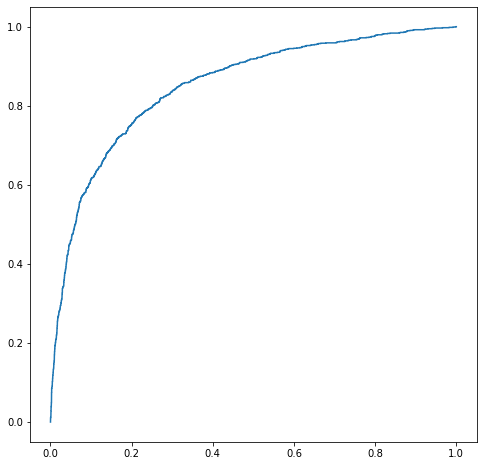

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.x;abel("Fpr",size=20)
plt.ylabel("Tpr",size=20)
plt.grid()